In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

### MinMax

In [3]:
def minMaxScale(data):
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_data = (data - min_value)/(max_value - min_value)
    
    return normalized_data, min_value, max_value

def minMaxDescale(normalized_data, min_value, max_value):
    
    denormalized_data = (normalized_data * (max_value - min_value)) + min_value
    
    return denormalized_data

### K-fold

In [4]:
def kfold(data, splits=10):
    np.random.seed(1200)
    folds = []
    indices = np.random.permutation(data.shape[0])
    folds_idx = np.array_split(indices, splits)
        
    for i in range(0, splits):
        train_idx = np.concatenate(folds_idx[:i] + folds_idx[i+1:])
        test_idx = folds_idx[i]
        folds.append((train_idx, test_idx))
    
    return folds

# Questão 1

### Preparação dos dados

In [5]:
data = np.genfromtxt("californiabin.csv", delimiter=',')

np.random.shuffle(data)
scaled_data = minMaxScale(data)

test_index = (int) (np.floor(data.shape[0] * 0.8))

scaled_train_x = data[:test_index, :8]
scaled_train_y = data[:test_index, 8]

scaled_test_x = data[test_index:, :8]
scaled_test_y = data[test_index:, 8]

## a)

### Obtenção dos melhores hiperparâmetros via grid-search

In [6]:
c = []
for p in range(-5, 16, 2):
    c.append(2**p)

gamma = []
for p in range(-15, 0, 2):
    gamma.append(2**p)

for p in range(1, 4):
    gamma.append(2**p)

parameters = {
    "C": c,
    "gamma": gamma
}

grid = GridSearchCV(SVC(), parameters, scoring = "accuracy", cv=10, verbose=3)

grid.fit(scaled_train_x, scaled_train_y)

print(grid.best_params_)

Fitting 10 folds for each of 121 candidates, totalling 1210 fits
[CV 1/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.506 total time=   0.2s
[CV 2/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.506 total time=   0.2s
[CV 3/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.506 total time=   0.2s
[CV 4/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.506 total time=   0.2s
[CV 5/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.519 total time=   0.2s
[CV 6/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.519 total time=   0.2s
[CV 7/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.494 total time=   0.2s
[CV 8/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.494 total time=   0.2s
[CV 9/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.506 total time=   0.2s
[CV 10/10] END C=0.03125, gamma=3.0517578125e-05;, score=0.494 total time=   0.2s
[CV 1/10] END .C=0.03125, gamma=0.0001220703125;, score=0.506 total time=   0.2s
[CV 2/10] END .C=0.03125, gamma=0.000122070

In [7]:
print('\n-------------------- MELHORES HIPERPARÂMETROS --------------------')
print('C:', grid.best_params_['C'])
print('Gamma:', grid.best_params_['gamma'])


-------------------- MELHORES HIPERPARÂMETROS --------------------
C: 2048
Gamma: 3.0517578125e-05


### Treino do modelo com os melhores hiperparâmetros

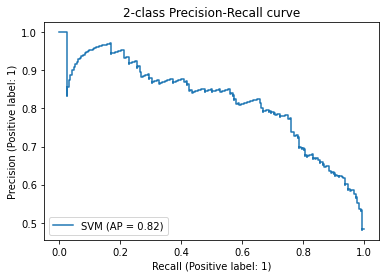

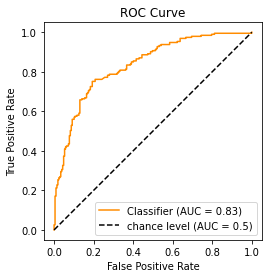

Média da Acurácia: 0.7575
Recall: 0.7668393782383419
F1-Score: 0.7531806615776082


In [15]:
svm = SVC(kernel='rbf', 
          C=grid.best_params_['C'], 
          gamma=grid.best_params_['gamma'], probability = True)

svm.fit(scaled_train_x, scaled_train_y)

yhat = svm.predict(scaled_test_x)
yhat_prob = svm.predict_proba(scaled_test_x)

acc = accuracy_score(scaled_test_y, yhat)
final_recall = recall_score(scaled_test_y, yhat, average='binary')
f1 = f1_score(scaled_test_y, yhat, average='binary')

# Curva precision-recall
display = PrecisionRecallDisplay.from_predictions(
    scaled_test_y, yhat_prob[:, 1], name="SVM"
)
_ = display.ax_.set_title("Curva Precision-Recall SVM")

plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(
    scaled_test_y,
    yhat_prob[:, 1],
    color="darkorange"
)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("Média da Acurácia:", acc)
print("Recall:", final_recall)
print("F1-Score:", f1)

## b)

### Obtenção dos melhores hiperparâmetros via grid-search

In [16]:
n_estimators = []
for n in range(10, 210, 10):
    n_estimators.append(n)

max_depth = []
for d in range(4, 12, 2):
    max_depth.append(d)

max_depth.append(None)

parameters = {
    "n_estimators": n_estimators,
    "max_depth": max_depth
}

grid = GridSearchCV(RandomForestClassifier(), parameters, scoring = "accuracy", cv=10, verbose=3)

grid.fit(scaled_train_x, scaled_train_y)

print(grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END .....max_depth=4, n_estimators=10;, score=0.863 total time=   0.1s
[CV 2/10] END .....max_depth=4, n_estimators=10;, score=0.750 total time=   0.1s
[CV 3/10] END .....max_depth=4, n_estimators=10;, score=0.800 total time=   0.3s
[CV 4/10] END .....max_depth=4, n_estimators=10;, score=0.819 total time=   0.1s
[CV 5/10] END .....max_depth=4, n_estimators=10;, score=0.806 total time=   0.0s
[CV 6/10] END .....max_depth=4, n_estimators=10;, score=0.806 total time=   0.0s
[CV 7/10] END .....max_depth=4, n_estimators=10;, score=0.831 total time=   0.0s
[CV 8/10] END .....max_depth=4, n_estimators=10;, score=0.856 total time=   0.0s
[CV 9/10] END .....max_depth=4, n_estimators=10;, score=0.762 total time=   0.0s
[CV 10/10] END ....max_depth=4, n_estimators=10;, score=0.775 total time=   0.1s
[CV 1/10] END .....max_depth=4, n_estimators=20;, score=0.863 total time=   0.1s
[CV 2/10] END .....max_depth=4, n_estimators

In [17]:
print('\n-------------------- MELHORES HIPERPARÂMETROS --------------------')
print('n_estimators:', grid.best_params_['n_estimators'])
print('max_depth:', grid.best_params_['max_depth'])


-------------------- MELHORES HIPERPARÂMETROS --------------------
n_estimators: 160
max_depth: None


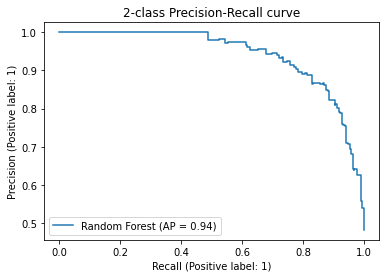

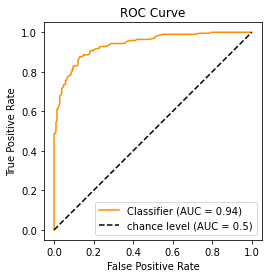

Média da Acurácia: 0.8625
Recall: 0.8290155440414507
F1-Score: 0.8533333333333334


In [21]:
svm = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'], 
                             max_depth=grid.best_params_['max_depth'])

svm.fit(scaled_train_x, scaled_train_y)

yhat = svm.predict(scaled_test_x)
yhat_prob = svm.predict_proba(scaled_test_x)

acc = accuracy_score(scaled_test_y, yhat)
final_recall = recall_score(scaled_test_y, yhat, average='binary')
f1 = f1_score(scaled_test_y, yhat, average='binary')

# Curva precision-recall
display = PrecisionRecallDisplay.from_predictions(
    scaled_test_y, yhat_prob[:, 1], name="Random Forest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(
    scaled_test_y,
    yhat_prob[:, 1],
    color="darkorange"
)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("Média da Acurácia:", acc)
print("Recall:", final_recall)
print("F1-Score:", f1)